In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import fiona
import cartopy
import cartopy.crs as ccrs
import os, glob
import pandas as pd
import geopandas as gpd
import json
import numpy as np
import seaborn as sns

In [2]:
path = r'g:\waterbody-area'
ts_path = os.path.join(path, 'time_series (1)')
wb_fn = os.path.join(path, 'waterbodies.geojson')
# data = fiona.open(wb_fn, 'r')

fns = glob.glob(os.path.join(ts_path, '*.geojson'))
fns[0:4]
# try read one polygon



['g:\\waterbody-area\\time_series (1)\\water_area_00000.geojson',
 'g:\\waterbody-area\\time_series (1)\\water_area_00001.geojson',
 'g:\\waterbody-area\\time_series (1)\\water_area_00002.geojson',
 'g:\\waterbody-area\\time_series (1)\\water_area_00003.geojson']

In [3]:
loc_fn = os.path.join(path, 'locations.geojson')
locs = gpd.read_file(loc_fn)

locs['geometry']


0        POINT (-16.76368609577542 22.2065784022556)
1       POINT (-12.09729752088815 28.06287540248758)
2        POINT (-13.87677026720051 26.5026814170288)
3       POINT (-13.63727941245425 26.65467636310182)
4       POINT (-13.62658946057323 26.61263520780503)
5       POINT (-13.56379722221327 26.66824092389203)
6       POINT (-13.88126184362111 26.42641444940705)
7       POINT (-13.90201292668427 26.47618111614727)
8       POINT (-14.15542766833439 26.01399790246778)
9       POINT (-6.292653649493042 34.38027763805812)
10      POINT (-6.259056657866972 34.86680519593725)
11      POINT (-6.244054792622176 34.96256560522439)
12      POINT (-6.211895105450697 35.01538654393062)
13      POINT (-5.400896066947593 35.44612872266593)
14      POINT (-5.298218629972732 35.22720928792601)
15      POINT (-5.388678979083568 35.67933137042336)
16      POINT (-5.495039508723319 35.56542499239701)
17      POINT (-5.725996368270448 35.63558341608674)
18      POINT (-5.764803588544411 35.775451105

In [150]:
def add_points(ax, geoms, transform=ccrs.PlateCarree()):
    ax.scatter([point.x for point in geoms],
           [point.y for point in geoms],
           transform=transform)
    return ax

def read_series(fn):
    with open(fn, 'r') as f:
        return json.loads(f.read())
#     return gpd.read_file(fn)

def plot_ts(data, var='water_area_value'):
    f = plt.figure()
    ax = plt.axes()
    ax.plot(data['features'][0]['properties'][var])
    return f, ax


def prepare_df(data, keys=['ndwi_threshold',
                           'quality_score',
                           'water_area_filled',
                           'water_area_filled_fraction',
                           'water_area_p',
                           'water_area_value'
                          ],
              dateindex='water_area_time',
              remove_p_zero=True):
    props = data['features'][0]['properties']
    p_lt_zero = np.array(props['water_area_p']) != 0  # indexes with p larger than zero
    index = pd.to_datetime(props['water_area_time'], unit='ms')
#     import pdb;pdb.set_trace()
    if remove_p_zero:
        # remove any value that gives a zero value for the probability estimate. 
        select_data = {x:np.array(props[x])[p_lt_zero] for x in keys}
        index = index[p_lt_zero]
    else:
        select_data = {x:props[x] for x in keys}
    return pd.DataFrame(select_data, index=index)

   
# f = plt.figure(figsize=(10, 8))
# ax = plt.axes(projection=ccrs.PlateCarree())
# ax = add_points(ax, locs['geometry'])
# ax.stock_img()


In [151]:
ts = read_series(fns[2106])
ts['features'][0]['properties'].keys()
# df = prepare_df(ts, remove_p_zero=False)
ts['features'][0]['properties']['water_area_filled_fraction']


[0.5190632859868078,
 0.5667654209408722,
 0.40248291826785576,
 0.5770712214995176,
 0.06176009393602354,
 0.30323985336214454,
 0.08913045171573335,
 0.3026909190290239,
 0.07144667545992577,
 0.27394325976192996,
 0.25415413455404184,
 0.055322851341897766,
 0.24105529656381444,
 0.060706623770169915,
 0.341012453459637,
 0.16996582332114035,
 0.3361636313186107,
 0.14408414319500915,
 0.307081134967839,
 0.0869383829245444,
 0.29595315629314817,
 0.4393461771311718,
 0.20844052295541152,
 0.3739477836293328,
 0.061070366204618476,
 0.364838981955477,
 0.07542610288949037,
 0.29669240072817876,
 0.10802244127645975,
 0.45239364718779734,
 0.13410293178852525,
 0.3762209470906459,
 0.12276576571208389,
 0.37549353095944216,
 0.16638258438413545,
 0.34008541698851813,
 0.06157415183365965,
 0.515973007407399,
 0.059591170588125866,
 0.44189134744734865,
 0.47972448768100223,
 0.052168896644817546,
 0.3667719068077242,
 0.2644656826797182,
 0.07878633971910347,
 0.27658161842970713,
 0

area 1
mission 1200
ndwi_threshold 1200
quality_score 1201
scale 1
water_area_filled 1201
water_area_filled_fraction 1201
water_area_p 1201
water_area_time 1201
water_area_time_jrc 370
water_area_value 1201
water_area_value_jrc 370


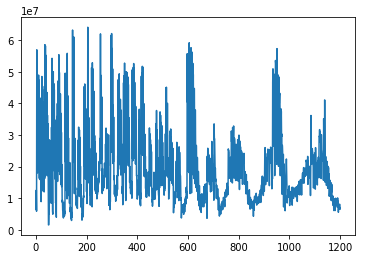

In [152]:
plot_ts(ts)
# pd.DataFrame(ts['features']['properties'])

for key in ts['features'][0]['properties'].keys():
    print(key, len(np.atleast_1d(ts['features'][0]['properties'][key])))


### plot individual time series
Plot both the water area, and water area filled in one plot. This gives a good idea of how much of the water body is derived from one 

In [211]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
def plot_fn(fn):
    ts = read_series(os.path.join(ts_path, fn))
    ### prepare pandas series conversion
    df = prepare_df(ts, remove_p_zero=False)
    f = plt.figure(figsize=(16,5))
    x = 'water_area_p'
    y = 'water_area_filled'
    y2 = 'water_area_value'
    ax = plt.axes()
    df[[y, y2]].plot(marker='.', linewidth=0.25, ax=ax, grid=True)
    ax.set_xlabel('Date')
    ax.set_ylabel('Surface [m2]')
    # fit a 3rd order polynomial
    a = np.polyfit(df[x], df[y], 3)
    y_predict = np.polyval(a, df[x])
    resid = df[y] - y_predict
    resid_rel = resid/df[y]
    df['predict'] = y_predict
    df['resid'] = resid
    df['resid_rel'] = resid_rel
    df['resid_rel'].plot(color='grey', alpha=0.5, secondary_y=True)
    
    
#     ax2 = plt.axes([0.7, 0.1, 0.2, 0.8])
    g = sns.jointplot(df['water_area_p'], df['water_area_filled'], kind='kde') # , 
    g.ax_marg_x.set_title(str(df['water_area_p'].corr(df['water_area_filled'])))
    g.ax_joint.plot(df[x], df['water_area_filled'], linewidth=0., marker='o', color='g', markeredgecolor='w')
    g.ax_joint.plot(df[x], y_predict, linewidth=0., marker='o', color='r', markeredgecolor='w')
    
#     df.plot.scatter('water_area_filled_fraction', 'water_area_filled', ax=ax2)

    
fns = glob.glob(os.path.join(ts_path, '*.geojson'))
# interact(plot_fn, i=range(len(fns)))
h = interact(plot_fn, fn=[os.path.split(fn)[1] for fn in fns[2105:]])



interactive(children=(Dropdown(description='fn', options=('water_area_02111.geojson', 'water_area_02112.geojson', 'water_area_02113.geojson', 'water_area_02114.geojson', 'water_area_02115.geojson', 'water_area_02116.geojson', 'water_area_02117.geojson', 'water_area_02118.geojson', 'water_area_02119.geojson', 'water_area_02120.geojson', 'water_area_02121.geojson', 'water_area_02122.geojson', 'water_area_02123.geojson', 'water_area_02124.geojson', 'water_area_02126.geojson', 'water_area_02127.geojson', 'water_area_02128.geojson', 'water_area_02129.geojson', 'water_area_02130.geojson', 'water_area_02131.geojson', 'water_area_02132.geojson', 'water_area_02133.geojson', 'water_area_02134.geojson', 'water_area_02135.geojson', 'water_area_02136.geojson', 'water_area_02137.geojson', 'water_area_02138.geojson', 'water_area_02139.geojson', 'water_area_02140.geojson', 'water_area_02141.geojson', 'water_area_02142.geojson', 'water_area_02143.geojson', 'water_area_02144.geojson', 'water_area_02145.geojson', 'water_area_02146.geojson', 'water_area_02147.geojson', 'water_area_02148.geojson', 'water_area_02149.geojson', 'water_area_02150.geojson', 'water_area_02151.geojson', 'water_area_02152.geojson', 'water_area_02153.geojson', 'water_area_02154.geojson', 'water_area_02155.geojson', 'water_area_02156.geojson', 'water_area_02157.geojson', 'water_area_02158.geojson', 'water_area_02159.geojson', 'water_area_02160.geojson', 'water_area_02161.geojson', 'water_area_02162.geojson', 'water_area_02163.geojson', 'water_area_02164.geojson', 'water_area_02165.geojson', 'water_area_02166.geojson', 'water_area_02167.geojson', 'water_area_02168.geojson', 'water_area_02169.geojson', 'water_area_02170.geojson', 'water_area_02171.geojson', 'water_area_02172.geojson', 'water_area_02173.geojson', 'water_area_02174.geojson', 'water_area_02175.geojson', 'water_area_02176.geojson', 'water_area_02177.geojson', 'water_area_02178.geojson', 'water_area_02179.geojson', 'water_area_02180.geojson', 'water_area_02181.geojson', 'water_area_02182.geojson', 'water_area_02183.geojson', 'water_area_02184.geojson', 'water_area_02185.geojson', 'water_area_02186.geojson', 'water_area_02187.geojson', 'water_area_02188.geojson', 'water_area_02189.geojson', 'water_area_02190.geojson', 'water_area_02191.geojson', 'water_area_02192.geojson', 'water_area_02193.geojson', 'water_area_02194.geojson', 'water_area_02195.geojson', 'water_area_02196.geojson', 'water_area_02197.geojson', 'water_area_02198.geojson', 'water_area_02199.geojson', 'water_area_02200.geojson', 'water_area_02201.geojson', 'water_area_02202.geojson', 'water_area_02203.geojson', 'water_area_02204.geojson', 'water_area_02205.geojson', 'water_area_02206.geojson', 'water_area_02207.geojson', 'water_area_02208.geojson', 'water_area_02209.geojson', 'water_area_02210.geojson', 'water_area_02211.geojson', 'water_area_02212.geojson', 'water_area_02213.geojson', 'water_area_02214.geojson', 'water_area_02215.geojson', 'water_area_02216.geojson', 'water_area_02217.geojson', 'water_area_02218.geojson', 'water_area_02219.geojson', 'water_area_02220.geojson', 'water_area_02221.geojson', 'water_area_02222.geojson', 'water_area_02223.geojson', 'water_area_02224.geojson', 'water_area_02225.geojson', 'water_area_02226.geojson', 'water_area_02227.geojson', 'water_area_02228.geojson', 'water_area_02229.geojson', 'water_area_02230.geojson', 'water_area_02231.geojson', 'water_area_02232.geojson', 'water_area_02233.geojson', 'water_area_02234.geojson', 'water_area_02235.geojson', 'water_area_02236.geojson', 'water_area_02237.geojson', 'water_area_02238.geojson', 'water_area_02239.geojson', 'water_area_02240.geojson', 'water_area_02241.geojson', 'water_area_02242.geojson', 'water_area_02243.geojson', 'water_area_02244.geojson', 'water_area_02245.geojson', 'water_area_02246.geojson', 'water_area_02247.geojson', 'water_area_02248.geojson', 'water_area_02249.geojson', 'water_area_02250.geojson', 'water_area_02251.geojson', 'water_area_02252.geoj

### Observations from relationships
- Large number of reservoirs with very small p-values (is this the probability of exceedance? seems so as small p-values concur with large surface areas.
- There are many reservoirs with only p-values close to zero. Why is this? Below I build a filter to remove these. 
- Quite somn occurrences where p-value = 0. and water_area_filled is non-unique. I have decided to remove any occurrence of p==0
- relationship p-value and filled in area is non-unique. Why? I would think this should be unique.

### analyze median values of time series of all reservoirs, and compare these over all reservoirs

In [37]:
### plot multiple reservoirs max area versus yearly variability in max area
fractions = []
area = []
ndwi = []
quality = []
p = []
area_filled = []
for fn in fns[:1000]:
#     print(fn)
    ts = read_series(os.path.join(ts_path, fn))
    df = prepare_df(ts)
    # extract medians of all
    q = df.quantile(0.5)
    fractions.append(q['water_area_filled_fraction'])
    area.append(q['water_area_value'])
    ndwi.append(q['ndwi_threshold'])
    quality.append(q['quality_score'])
    area_filled.append(q['water_area_filled'])
    p.append(q['water_area_p'])

# len(fns)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


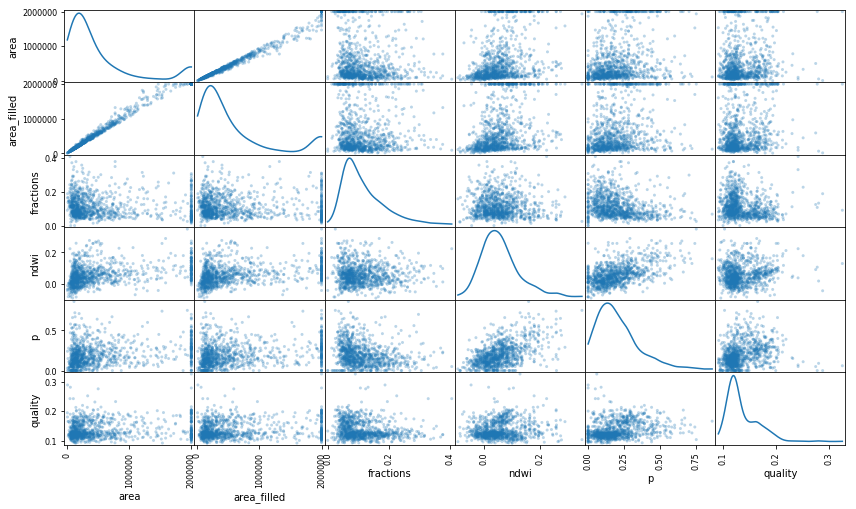

In [46]:
# plot in several scatter plots
df_corr = pd.DataFrame({'fractions': fractions,
                        'area': np.minimum(np.array(area), 2e6),
                        'ndwi': ndwi,
                        'quality': quality,
                        'area_filled': np.minimum(np.array(area_filled), 2e6),
                        'p': p
                       })
pd.scatter_matrix(df_corr, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### comments on analysis above 
Above, we plot the median value of all properties of all time series against each other in scatter plots. I don't see a clear relationship. The hypothesis was that with smaller area, the amount of infilling required would be higher, but this does not seem to be the case. Above, I have not done any filtering based on significance of signal (p-value versus variability) this could be a logical next step for analysis below. 

The only meaningful relationship found is ndwi threshold against the p-value. The lower the median ndwi threshold, the lower the p-value we find. It is not fully clear what causes this relationship. It is also not clear if this has any meaning. There is also a reasonable relationship between ndwi threshold and area/area_filled. Note: we plotted area to a certain maximum here.

### analyze sensitivity of surface area with respect to p-

### select sensible sets based on signal/noise in p-value / surface variability
We suspect that the variability in p-values have a relationship with the variability in surface area values. The hypothesis is as follows:
- a good correlation with surface area and p-values is required to obtain a good signal/noise ratio. In fact, I would suspect the relationship to be perfectly linear, this seems not to be the case, so I am adding an analysis of the correlation, until we understand why this relationship is not linear
- when surface area variability over the full series is large, we expect a more pronounced signal. We try to measure this as follows: we compute (Amax-Amin)/Amax. When this is close to 1, then we have a good signal, if close to zero (i.e. range much smaler than absolute value of surface) then we cannot measure much variability.
- finally, it would be very good if we would be able to measure the goodness of fit of one single value of p over a single image to get a good estimate of the left-over uncertainty in the surface area estimation. This would result in small water bodies to give a less well defined surface area for a given observation. We cannot do this at the moment, so rerunning analyses for a target area again, but then including the distribution of p-values found over the water edge would be nice.


In [202]:
def filter_series(fns, corr_min=0.75, A_var_min=0.75, p_var_min=0.5):
    """
    Filter the series based on a number of criteria. We leave out series with:
    - too little correlation between water_area_filled and water_area_p
    - too little variability in surface area compared to the maximum surface area (Amax-Amin)/Amax
    """
    fns_filter = []
    for fn in fns:
        try:
            ts = read_series(os.path.join(ts_path, fn))
            ### prepare pandas series conversion
            df = prepare_df(ts)
            test_corr = df['water_area_p'].corr(df['water_area_filled'])
            test_A_var = (df['water_area_filled'].max()-df['water_area_filled'].min())/df['water_area_filled'].max()
            test_p_var = df['water_area_p'].max() - df['water_area_p'].min()
#             print('fn: {:s} corr: {:f} A_var: {:f} p_var: {:f}'.format(fn, test_corr, test_A_var, test_p_var))
            if (test_corr <= -corr_min) & (test_A_var >= A_var_min) & (test_p_var >= p_var_min):
                fns_filter.append(fn)
        except:
            print('fn: {:s} is mal-formatted, time series not equal in length'.format(fn))
    return fns_filter


### UNQUOTE BELOW TO FILTER A NEW SET OF FILES
# fns_filter = filter_series(fns)
# print('Amount of files suitable after filtering: {:d} out of {:d}'.format(len(fns_filter), len(fns)))
# df_fns_filter = pd.DataFrame(fns_filter, columns=['files'])
# df_fns_filter.to_csv('filtered_files.csv')
######

#### retrieve a set of filtered files below.
df2 = pd.read_csv('filtered_files.csv')
fns_filter = df2['files'].values.tolist()


In [212]:
h = interact(plot_fn, fn=[os.path.split(fn)[1] for fn in fns_filtered2])



interactive(children=(Dropdown(description='fn', options=('water_area_00011.geojson', 'water_area_00013.geojson', 'water_area_00015.geojson', 'water_area_00016.geojson', 'water_area_00017.geojson', 'water_area_00019.geojson', 'water_area_00020.geojson', 'water_area_00021.geojson', 'water_area_00027.geojson', 'water_area_00030.geojson', 'water_area_00031.geojson', 'water_area_00032.geojson', 'water_area_00033.geojson', 'water_area_00034.geojson', 'water_area_00036.geojson', 'water_area_00037.geojson', 'water_area_00038.geojson', 'water_area_00039.geojson', 'water_area_00041.geojson', 'water_area_00042.geojson', 'water_area_00045.geojson', 'water_area_00046.geojson', 'water_area_00048.geojson', 'water_area_00049.geojson', 'water_area_00050.geojson', 'water_area_00052.geojson', 'water_area_00055.geojson', 'water_area_00056.geojson', 'water_area_00057.geojson', 'water_area_00058.geojson', 'water_area_00062.geojson', 'water_area_00064.geojson', 'water_area_00065.geojson', 'water_area_00066.geojson', 'water_area_00067.geojson', 'water_area_00071.geojson', 'water_area_00072.geojson', 'water_area_00073.geojson', 'water_area_00075.geojson', 'water_area_00076.geojson', 'water_area_00078.geojson', 'water_area_00079.geojson', 'water_area_00080.geojson', 'water_area_00081.geojson', 'water_area_00083.geojson', 'water_area_00089.geojson', 'water_area_00093.geojson', 'water_area_00094.geojson', 'water_area_00095.geojson', 'water_area_00097.geojson', 'water_area_00101.geojson', 'water_area_00102.geojson', 'water_area_00103.geojson', 'water_area_00104.geojson', 'water_area_00105.geojson', 'water_area_00106.geojson', 'water_area_00107.geojson', 'water_area_00108.geojson', 'water_area_00109.geojson', 'water_area_00110.geojson', 'water_area_00118.geojson', 'water_area_00119.geojson', 'water_area_00120.geojson', 'water_area_00121.geojson', 'water_area_00122.geojson', 'water_area_00123.geojson', 'water_area_00124.geojson', 'water_area_00125.geojson', 'water_area_00126.geojson', 'water_area_00127.geojson', 'water_area_00129.geojson', 'water_area_00130.geojson', 'water_area_00132.geojson', 'water_area_00133.geojson', 'water_area_00134.geojson', 'water_area_00135.geojson', 'water_area_00137.geojson', 'water_area_00139.geojson', 'water_area_00140.geojson', 'water_area_00141.geojson', 'water_area_00142.geojson', 'water_area_00144.geojson', 'water_area_00145.geojson', 'water_area_00146.geojson', 'water_area_00147.geojson', 'water_area_00148.geojson', 'water_area_00149.geojson', 'water_area_00150.geojson', 'water_area_00151.geojson', 'water_area_00152.geojson', 'water_area_00153.geojson', 'water_area_00154.geojson', 'water_area_00155.geojson', 'water_area_00156.geojson', 'water_area_00157.geojson', 'water_area_00159.geojson', 'water_area_00161.geojson', 'water_area_00162.geojson', 'water_area_00163.geojson', 'water_area_00164.geojson', 'water_area_00167.geojson', 'water_area_00168.geojson', 'water_area_00169.geojson', 'water_area_00170.geojson', 'water_area_00171.geojson', 'water_area_00172.geojson', 'water_area_00173.geojson', 'water_area_00175.geojson', 'water_area_00176.geojson', 'water_area_00178.geojson', 'water_area_00179.geojson', 'water_area_00180.geojson', 'water_area_00181.geojson', 'water_area_00183.geojson', 'water_area_00184.geojson', 'water_area_00185.geojson', 'water_area_00187.geojson', 'water_area_00188.geojson', 'water_area_00189.geojson', 'water_area_00193.geojson', 'water_area_00194.geojson', 'water_area_00196.geojson', 'water_area_00197.geojson', 'water_area_00198.geojson', 'water_area_00200.geojson', 'water_area_00201.geojson', 'water_area_00203.geojson', 'water_area_00204.geojson', 'water_area_00206.geojson', 'water_area_00207.geojson', 'water_area_00208.geojson', 'water_area_00209.geojson', 'water_area_00211.geojson', 'water_area_00216.geojson', 'water_area_00217.geojson', 'water_area_00218.geojson', 'water_area_00219.geojson', 'water_area_00220.geojson', 'water_area_00221.geojson', 'water_area_00222.geojson', 'water_area_00223.geoj

1985-01-09 10:27:28.387     93916.655203
1985-01-25 10:27:33.419      1326.289294
1985-02-17 10:33:47.459      2912.704517
1985-03-05 10:33:47.372    -18751.721509
1985-03-14 10:27:35.699     -1445.103943
1985-04-15 10:27:28.083     11067.345010
1985-05-01 10:27:21.140    -54096.192479
1985-05-08 10:33:27.809    -15391.400217
1985-05-17 10:27:17.141     -5384.176758
1985-05-24 10:33:28.190      6568.261864
1985-06-02 10:27:17.213     24913.050280
1985-07-04 10:27:10.146     53932.590760
1985-07-27 10:33:11.300     32536.126945
1985-08-05 10:26:55.804    -50641.941258
1985-08-12 10:33:02.427     38103.589860
1985-08-21 10:26:45.715     23958.301454
1985-08-28 10:32:51.746     21178.412790
1985-09-22 10:26:21.856     18165.050148
1985-10-08 10:26:12.567     31531.324614
1985-10-15 10:32:18.644     -1458.377999
1985-10-24 10:26:01.098     19348.492621
1985-10-31 10:32:06.256   -136576.328282
1985-11-09 10:25:47.310      4497.442529
1985-11-16 10:31:51.294    -22468.892043
1985-12-02 10:31

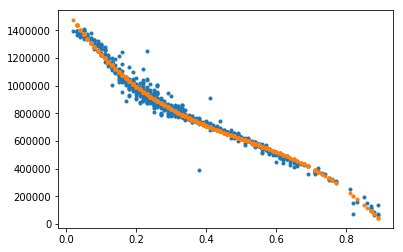

In [208]:
ts = read_series(fns_filter[0])
### prepare pandas series conversion
df = prepare_df(ts)
df
# test polyfit
x = df['water_area_p']
y = df['water_area_filled']

a = np.polyfit(x, y, 3, cov=True)
y2 = np.polyval(a[0], x)
plt.plot(x, y, '.')
plt.plot(x, y2, '.')
y - y2

In [189]:
len(a[1])

5

In [57]:
### Select subset for regions in different areas
ts['features'][0]['properties']['area']

812834.1795637291

In [66]:
### select subset for different size intervals

In [68]:
### time series filtering based on temporal correlations, which series make sense autocorrelatie function

### TODO
- Assess p-value distribution rather than one (median? or is it mean?) value.

